![Hybrid Recommendation System Architecture.png](<attachment:Hybrid Recommendation System Architecture.png>)
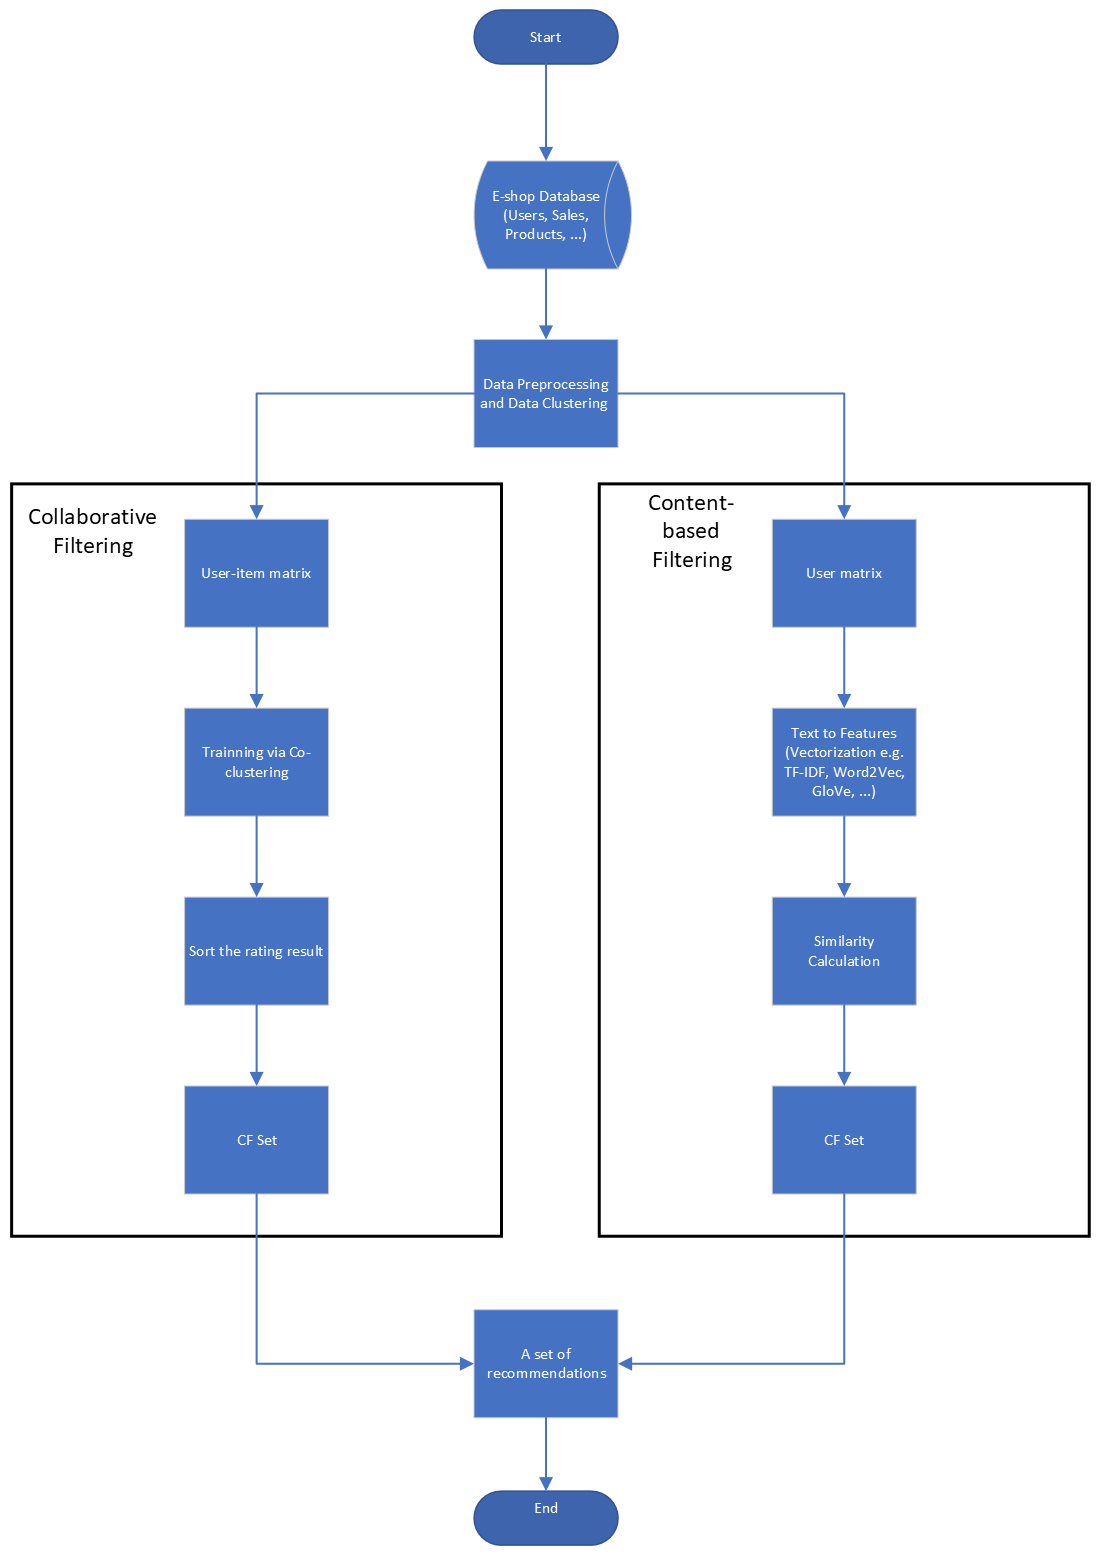

In [43]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import random

In [44]:
data_path='Datasets/Rec_sys_data.xlsx'# @param {type:"string"}

In [45]:
order_df = pd.read_excel(data_path, 'order')
order_df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,DeliveryDate,Discount%,ShipMode,ShippingCost,CustomerID
0,536365,84029E,6,2010-12-01 08:26:00,2010-12-02 08:26:00,0.20,ExpressAir,30.12,17850
1,536365,71053,6,2010-12-01 08:26:00,2010-12-02 08:26:00,0.21,ExpressAir,30.12,17850
2,536365,21730,6,2010-12-01 08:26:00,2010-12-03 08:26:00,0.56,Regular Air,15.22,17850
3,536365,84406B,8,2010-12-01 08:26:00,2010-12-03 08:26:00,0.30,Regular Air,15.22,17850
4,536365,22752,2,2010-12-01 08:26:00,2010-12-04 08:26:00,0.57,Delivery Truck,5.81,17850


In [46]:
product_df=pd.read_excel(data_path,'product')
product_df.head()

,StockCode,Product Name,Description,Category,Brand,Unit Price
0,22629,Ganma Superheroes Ordinary Life Case For Samsu...,"New unique design, great gift.High quality pla...",Cell Phones|Cellphone Accessories|Cases & Prot...,Ganma,13.99
1,21238,Eye Buy Express Prescription Glasses Mens Wome...,Rounded rectangular cat-eye reading glasses. T...,Health|Home Health Care|Daily Living Aids,Eye Buy Express,19.22
2,22181,MightySkins Skin Decal Wrap Compatible with Ni...,Each Nintendo 2DS kit is printed with super-hi...,Video Games|Video Game Accessories|Accessories...,Mightyskins,14.99
3,84879,Mediven Sheer and Soft 15-20 mmHg Thigh w/ Lac...,The sheerest compression stocking in its class...,Health|Medicine Cabinet|Braces & Supports,Medi,62.38
4,84836,Stupell Industries Chevron Initial Wall D cor,Features: -Made in the USA. -Sawtooth hanger o...,Home Improvement|Paint|Wall Decals|All Wall De...,Stupell Industries,35.99


In [47]:
data_df=pd.merge(order_df,product_df)
data_df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,DeliveryDate,Discount%,ShipMode,ShippingCost,CustomerID,Product Name,Description,Category,Brand,Unit Price
0,536365,84029E,6,2010-12-01 08:26:00,2010-12-02 08:26:00,0.20,ExpressAir,30.12,17850,"3 1/2""W x 20""D x 20""H Funston Craftsman Smooth...",Our Rustic Collection is an instant classic. O...,Home Improvement|Hardware|Brackets and Angle I...,Ekena Milwork,199.11
1,536373,84029E,6,2010-12-01 09:02:00,2010-12-02 09:02:00,0.55,ExpressAir,30.12,17850,"3 1/2""W x 20""D x 20""H Funston Craftsman Smooth...",Our Rustic Collection is an instant classic. O...,Home Improvement|Hardware|Brackets and Angle I...,Ekena Milwork,199.11
2,536375,84029E,6,2010-12-01 09:32:00,2010-12-03 09:32:00,0.18,Regular Air,15.22,17850,"3 1/2""W x 20""D x 20""H Funston Craftsman Smooth...",Our Rustic Collection is an instant classic. O...,Home Improvement|Hardware|Brackets and Angle I...,Ekena Milwork,199.11
3,536396,84029E,6,2010-12-01 10:51:00,2010-12-02 10:51:00,0.06,ExpressAir,30.12,17850,"3 1/2""W x 20""D x 20""H Funston Craftsman Smooth...",Our Rustic Collection is an instant classic. O...,Home Improvement|Hardware|Brackets and Angle I...,Ekena Milwork,199.11
4,536406,84029E,6,2010-12-01 11:33:00,2010-12-03 11:33:00,0.42,Regular Air,15.22,17850,"3 1/2""W x 20""D x 20""H Funston Craftsman Smooth...",Our Rustic Collection is an instant classic. O...,Home Improvement|Hardware|Brackets and Angle I...,Ekena Milwork,199.11


## Collborative Filltering

### User-item Matrix

User Matrix

In [31]:
data1 = data_df.dropna()

In [32]:
data1.StockCode = data1.StockCode.astype(str)

C:\Users\COHOTECH\AppData\Local\Temp\ipykernel_2724\3251052305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.StockCode = data1.StockCode.astype(str)


In [33]:
purchase_df = (data1.groupby(['CustomerID', 'StockCode'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('CustomerID'))
purchase_df.head()

StockCode,10002,10120,10123C,10124A,10124G,10125,10133,10135,11001,15030,...,90214M,90214N,90214R,90214S,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
12350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0


In [34]:
def encode_units(x):
    if x < 1: # If the quantity is less than 1
        return 0 # Not purchased
    if x >= 1: # If the quantity is greater than 1
        return 1 # Purchased

In [35]:
user_similarities = cosine_similarity(purchase_df)

In [36]:
user_similarity_data = pd.DataFrame(user_similarities,index=purchase_df.index,columns=purchase_df.index)
user_similarity_data.head()

CustomerID,12346,12347,12348,12350,12352,12353,12354,12355,12356,12358,...,18269,18270,18272,18273,18278,18280,18281,18282,18283,18287
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.054932,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
12347,0.0,1.000000,0.160007,0.018423,0.022183,0.0,0.015584,0.639641,0.162806,0.000000,...,0.077577,0.000000,0.004169,0.0,0.012876,0.030814,0.0,0.0,0.040874,0.150936
12348,0.0,0.160007,1.000000,0.000315,0.001073,0.0,0.011369,0.286599,0.237554,0.001051,...,0.000000,0.000000,0.028152,0.0,0.000000,0.000000,0.0,0.0,0.148903,0.090842
12350,0.0,0.018423,0.000315,1.000000,0.001318,0.0,0.000000,0.000000,0.001238,0.001291,...,0.000000,0.000000,0.025930,0.0,0.000000,0.000000,0.0,0.0,0.028340,0.000000
12352,0.0,0.022183,0.001073,0.001318,1.000000,0.0,0.050090,0.001141,0.073003,0.067742,...,0.113205,0.096845,0.102318,0.0,0.000000,0.000000,0.0,0.0,0.032896,0.031095


In [37]:
def fetch_similar_users(user_id,k=5):
    # separating data rows for the entered user id
    user_similarity = user_similarity_data[user_similarity_data.index == user_id]
    # a data of all other users
    other_users_similarities = user_similarity_data[user_similarity_data.index != user_id]
    # calcuate cosine similarity between user and each other user
    similarities = cosine_similarity(user_similarity,other_users_similarities)[0].tolist()
    user_indices = other_users_similarities.index.tolist()
    index_similarity_pair = dict(zip(user_indices, similarities))
    # sort by similarity
    sorted_index_similarity_pair = sorted(index_similarity_pair.items(),reverse=True)
    top_k_users_similarities = sorted_index_similarity_pair[:k]
    similar_users = [u[0] for u in top_k_users_similarities]
    print('The users with behaviour similar to that of user {0} are:'.format(user_id))
    return similar_users

In [38]:
similar_users = fetch_similar_users(12347)
similar_users

The users with behaviour similar to that of user 12347 are:


[18287, 18283, 18282, 18281, 18280]

In [41]:
def simular_users_recommendation(userid):
    similar_users = fetch_similar_users(userid)
    #obtaining all the items bought by similar users
    simular_users_recommendation_list = []
    for j in similar_users:
        item_list = data1[data1["CustomerID"]==j]['Description'].to_list()
        simular_users_recommendation_list.append(item_list)
    #this gives us multi-dimensional list
    # we need to flatten it
    flat_list = []
    for sublist in simular_users_recommendation_list:
        for item in sublist:
            flat_list.append(item)
    final_recommendations_list = list(dict.fromkeys(flat_list))
    # storing 10 random recommendations in a list
    ten_random_recommendations = random.sample(final_recommendations_list, 10)
    print('Items bought by Similar users based on Cosine Similarity')
    #returning 10 random recommendations
    return ten_random_recommendations

In [42]:
simular_users_recommendation(12347)

The users with behaviour similar to that of user 12347 are:
Items bought by Similar users based on Cosine Similarity


["Description: Do you want to cheer for your idol in the 2018 World Cup? The World Cup sticker is here for you. RocooArt's tattoo sticker which is 100% brand new and high quality. Waterproof, sweatproof good ventilation performance and no harm to your skin. It would be keep for 2-3 days depending on where you use it. The most appropriate tattoo sticker is the RocooArt's tattoo sticker. Features: This product is certified by EN71 and ASTM, 100% brand new, high Quality and no harm to your skin. Excellent quality Environmental Water Transfer Sticker.It can be printed very quickly on your skin. RocooArt's tattoo sticker which is high quality. Waterproof, sweatproof good ventilation performance. There are 32 kinds of patterns for you to choose. Easy to use, easy to clean up. Specifications: Item Type: Sticker Material: Environmental Water Transfer Sticker Optional Types: Russia; Uruguay; Portugal; Spain; French; Danish; Argentina; Croatia; Brazil; Costa rica; Germany; Mexico; Belgium; Engla

Item - Based